In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# Step 1: Load the Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target


In [18]:
feature_names = X.columns

In [3]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Step 4: Train models with polynomial degrees
degrees = [1, 2, 3, 4]
results = []


In [6]:
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append({
        'degree': degree,
        'model': model,
        'poly': poly,
        'mse': mse
    })
    print(f"Degree {degree} - MSE: {mse:.4f}")


Degree 1 - MSE: 24.2911
Degree 2 - MSE: 14.2471
Degree 3 - MSE: 7717.1199
Degree 4 - MSE: 253.1183


In [7]:
# Step 5: Visualize model behavior w.r.t. one feature (e.g., RM)
feature_index = X.columns.get_loc('RM')  # feature to vary
feature_name = 'RM'


In [8]:
# Fix all features at their mean
mean_features = np.mean(X_train_scaled, axis=0)


In [12]:
mean_features

array([-2.63815372e-17,  0.00000000e+00, -4.17707673e-17,  1.31907686e-17,
       -5.11142284e-16, -2.61616911e-16, -4.85859977e-16,  5.24882668e-17,
       -9.45338417e-17, -1.51693839e-16,  8.51903806e-16, -4.94653823e-16,
       -1.79174607e-16])

In [9]:
# Generate points for the selected feature
X_plot = np.linspace(
    X_train_scaled[:, feature_index].min(),
    X_train_scaled[:, feature_index].max(),
    100
).reshape(-1, 1)


In [20]:
X_plot

array([[-2.63815372e-17,  0.00000000e+00, -4.17707673e-17, ...,
         8.51903806e-16, -4.94653823e-16, -1.51055936e+00],
       [-2.63815372e-17,  0.00000000e+00, -4.17707673e-17, ...,
         8.51903806e-16, -4.94653823e-16, -1.45901297e+00],
       [-2.63815372e-17,  0.00000000e+00, -4.17707673e-17, ...,
         8.51903806e-16, -4.94653823e-16, -1.40746657e+00],
       ...,
       [-2.63815372e-17,  0.00000000e+00, -4.17707673e-17, ...,
         8.51903806e-16, -4.94653823e-16,  3.48944076e+00],
       [-2.63815372e-17,  0.00000000e+00, -4.17707673e-17, ...,
         8.51903806e-16, -4.94653823e-16,  3.54098715e+00],
       [-2.63815372e-17,  0.00000000e+00, -4.17707673e-17, ...,
         8.51903806e-16, -4.94653823e-16,  3.59253354e+00]])

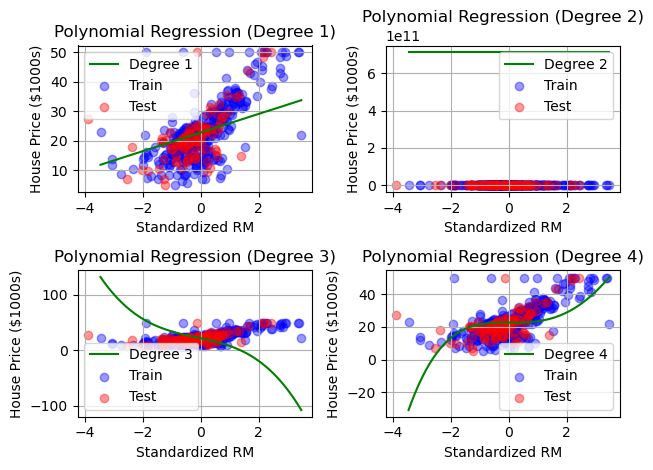

In [ ]:
# Step 6: Compare models visually
plt.figure(figsize=(15, 10))

for i, result in enumerate(results):
    model = result['model']
    poly = result['poly']
    degree = result['degree']
    
    # Copy mean features and vary just the selected feature (e.g., RM)
    X_plot_full = np.tile(mean_features, (100, 1))
    X_plot_full[:, feature_index] = X_plot.flatten()
    
    X_plot_poly = poly.transform(X_plot_full)
    y_plot = model.predict(X_plot_poly)
    
    # Plotting
    plt.subplot(2, 2, i + 1)
    plt.plot(X_plot, y_plot, color='green', label=f'Degree {degree}')
    plt.scatter(X_train_scaled[:, feature_index], y_train, color='blue', alpha=0.4, label='Train')
    plt.scatter(X_test_scaled[:, feature_index], y_test, color='red', alpha=0.4, label='Test')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel(f'Standardized {feature_name}')
    plt.ylabel('House Price ($1000s)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Plotting for all features with degree 2

In [15]:
#Prepare for plotting
mean_features = np.mean(X_train_scaled, axis=0)
n_features = X.shape[1]

In [16]:
# Set up subplots
n_cols = 4
n_rows = int(np.ceil(n_features / n_cols))
plt.figure(figsize=(n_cols * 5, n_rows * 4))

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

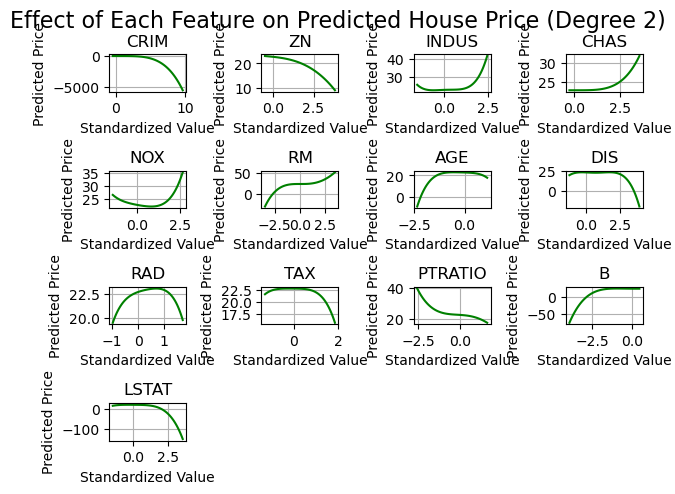

In [19]:
# Step 7: Plot predictions for each feature
for idx in range(n_features):
    # Generate values for the selected feature
    f_vals = np.linspace(
        X_train_scaled[:, idx].min(),
        X_train_scaled[:, idx].max(),
        100
    ).reshape(-1, 1)

    # Duplicate mean feature vector and replace one column
    X_plot = np.tile(mean_features, (100, 1))
    X_plot[:, idx] = f_vals.flatten()

    # Transform and predict
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    # Plot
    plt.subplot(n_rows, n_cols, idx + 1)
    plt.plot(f_vals, y_plot, color='green')
    plt.title(feature_names[idx])
    plt.xlabel('Standardized Value')
    plt.ylabel('Predicted Price')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Effect of Each Feature on Predicted House Price (Degree 2)', fontsize=16, y=1.02)
plt.show()